# School Budgets: Use Data to Have a Social Impact

Data science isn't just for predicting ad-clicks-it's also useful for social impact! This course is a case study from a machine learning competition on DrivenData. You'll explore a problem related to school district budgeting. By **building a model to automatically classify items in a school's budget**, it makes it easier and faster for schools to compare their spending with other schools. In this course, you'll begin by building a baseline model that is a simple, first-pass approach. In particular, you'll do some **natural language processing** to prepare the budgets for modeling. Next, you'll have the opportunity to try your own techniques and see how they compare to participants from the competition. Finally, you'll see how the winner was able to combine a number of expert techniques to build the most accurate model.

You're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. Function: Career & Academic Counseling, or Position_Type: Librarian.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples. We have ourselves a **multi-class-multi-label classification problem**, because there are 9 broad categories that each take on many possible sub-label instances.

# Loading the data

Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some **Exploratory Data Analysis (EDA)** of it.

The training data is available as `TrainingData.csv`. Your first task is to load it into a DataFrame using `pd.read_csv()` along with the keyword argument `index_col=0`.

Use methods such as `.info()`, `.head()`, and `.tail()` to explore the budget data and the properties of the features and labels.

Some of the column names correspond to features - descriptions of the budget items - such as the `Job_Title_Description column`. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item labels you will be trying to predict with your model. For example, the `Object_Type` column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

Use `df.info()` to answer the following questions:

- How many rows are there in the training data?
- How many columns are there in the training data?
- How many non-null entries are in the `Job_Title_Description` column?

In [3]:
import pandas as pd

df = pd.read_csv('TrainingData.csv', index_col=0)
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


In [4]:
df.shape

(1560, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 198 to 101861
Data columns (total 25 columns):
Function                  1560 non-null object
Use                       1560 non-null object
Sharing                   1560 non-null object
Reporting                 1560 non-null object
Student_Type              1560 non-null object
Position_Type             1560 non-null object
Object_Type               1560 non-null object
Pre_K                     1560 non-null object
Operating_Status          1560 non-null object
Object_Description        1461 non-null object
Text_2                    382 non-null object
SubFund_Description       1183 non-null object
Job_Title_Description     1131 non-null object
Text_3                    296 non-null object
Text_4                    193 non-null object
Sub_Object_Description    364 non-null object
Location_Description      874 non-null object
FTE                       449 non-null float64
Function_Description      1340 non-null object
F

# Summarizing the data

You'll continue your EDA in this exercise by computing **summary statistics** for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called df.

You can use `df.info()` to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called `FTE` and `Total`.

`FTE`: Stands for `"full-time equivalent"`. If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
`Total`: Stands for the `total cost of the expenditure`. This number tells us how much the budget item cost.

After printing **summary statistics** for the numeric data, your job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.

In [6]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.446867e+04
std      0.452844  7.916752e+04
min     -0.002369 -1.044084e+06
25%      0.004310  1.108111e+02
50%      0.440000  7.060299e+02
75%      1.000000  5.347760e+03
max      1.047222  1.367500e+06


<Figure size 640x480 with 1 Axes>

# Exploring datatypes in pandas

It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be involved. Towards that end, let's explore what we have.

The data has been loaded into the workspace as `df`. Your job is to look at the DataFrame attribute `.dtypes`, and call its `.value_counts()` method in order to answer the question below.

Make sure to call `df.dtypes.value_counts()`, and not df.value_counts()! Check out the difference in the Shell. df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

How many columns with dtype object are in the data?

In [7]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

# Encode the labels as categorical variables

Remember, **your ultimate goal is to predict the probability that a certain label is attached to a budget line item**. You just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using `df[LABELS].dtypes`.

You will notice that every label is encoded as an object datatype. Because **category datatypes are much more efficient** your task is to convert the labels to category types using the `.astype()` method.

Note: `.astype()` only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the `.apply()` method and provide a **lambda function** called `categorize_label` that applies `.astype()` to each column, x.

In [8]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']
df[LABELS].dtypes

Function            object
Use                 object
Sharing             object
Reporting           object
Student_Type        object
Position_Type       object
Object_Type         object
Pre_K               object
Operating_Status    object
dtype: object

In [9]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


# Counting unique labels

There are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe `df` and the `LABELS` list have been loaded into the workspace; the `LABELS` columns of `df` have been converted to **category types**.

pandas, which has been pre-imported as pd, provides a `pd.Series.nunique` method for counting the number of unique values in a Series.

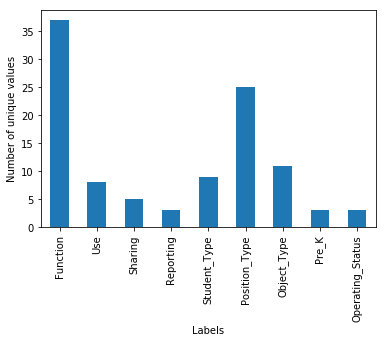

In [10]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

# Computing log loss with NumPy

To see how the **log loss metric** handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function `compute_log_loss()`.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the `compute_log_loss(predicted_values, actual_values)`. It takes the predicted values as the first argument and the actual values as the second argument.

In [11]:
actual_labels = [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
correct_confident = [0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05]
correct_not_confident = [0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35]
wrong_not_confident = [0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65]
wrong_confident = [0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95]

In [12]:
import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
         actual when these are 1D arrays.

         :param predicted: The predicted probabilities as floats between 0-1
         :param actual: The actual binary labels. Either 0 or 1.
         :param eps (optional): log(0) is inf, so we need to offset our
         predicted values slightly by eps from 0 or 1.
     """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    return loss

In [ ]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 

# Setting up a train-test split in scikit-learn

Alright, you've been patient and awesome. It's finally time to start training models!

The first step is to `split the data into a training set and a test set`. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least `min_count` examples of each label appear in each split: `multilabel_train_test_split`.

You'll start with a simple model that uses just the numeric columns of your DataFrame when calling `multilabel_train_test_split`. The data has been read into a DataFrame df and a list consisting of just the numeric columns is available as `NUMERIC_COLUMNS`.

In [15]:
# From: https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/data/multilabel.py
# See also: https://github.com/drivendataorg/box-plots-sklearn/blob/master/notebooks/1.0-full-model.ipynb

from warnings import warn

import numpy as np
import pandas as pd

def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])


def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]


def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [16]:
NUMERIC_COLUMNS = ['FTE', 'Total']
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 
          'Object_Type', 'Pre_K', 'Operating_Status']

In [17]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 101861
Data columns (total 2 columns):
FTE      1040 non-null float64
Total    1040 non-null float64
dtypes: float64(2)
memory usage: 24.4 KB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Data columns (total 2 columns):
FTE      520 non-null float64
Total    520 non-null float64
dtypes: float64(2)
memory usage: 12.2 KB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 198 to 101861
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 113.8 KB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 209 to 448628
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 56.9 KB
None


# Training a model

With split data in hand, you're only a few lines away from training a model.

In this exercise, you will import the `logistic regression` and `one versus rest classifiers` in order to fit a **multi-class logistic regression model** to the NUMERIC_COLUMNS of your feature data.

Then you'll test and print the accuracy with the `.score()` method to see the results of training.

Before you train! Remember, we're ultimately going to be using `logloss` to score our model, so don't worry too much about the accuracy here. Keep in mind that you're throwing away all of the text data in the dataset - that's by far most of the data! So don't get your hopes up for a killer performance just yet. We're just interested in getting things up and running at the moment.

All data necessary to call `multilabel_train_test_split()` has been loaded into the workspace.

In [18]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


# Use your model to predict values on holdout data

You're ready to make some predictions! Remember, the `train-test-split` you've carried out so far is for model development. The original competition provides an additional test set, for which you'll never actually see the correct labels. This is called the `"holdout data."`

The point of the **holdout data** is to provide a fair test for machine learning competitions. If the labels aren't known by anyone but DataCamp, DrivenData, or whoever is hosting the competition, you can be sure that no one submits a mere copy of labels to artificially pump up the performance on their model.

Remember that **the original goal is to predict the probability of each label**. In this exercise you'll do just that by using the `.predict_proba()` method on your trained model.

First, however, you'll need to load the holdout data, which is available in the workspace as the file `HoldoutData.csv`.

In [19]:
# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)
holdout.head()

,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
237,Personal Services - Teachers,Instruction - Regular,NaN,NaN,NaN,NaN,NaN,0.0,NaN,TIME CARD CERTIFIEDAddl,Alternative Schools Instruction,175.350000,NaN,NaN,General Purpose School,NaN
466,Extra Duty/Signing Bonus Pay,Basic Educational Services,NaN,NaN,NaN,General,School,NaN,Instruction,NaN,NaN,43424.905849,NaN,NaN,General Fund,NaN
784,OTHER PERSONAL SERVICES,NaN,NaN,SUB TEACHER ALL,NaN,NaN,STAFF DEV AND INSTR MEDIA,0.0,INST STAFF TRAINING SVCS,NaN,NaN,75.090000,NaN,NaN,GENERAL FUND,TEACHER TRAINING
1786,TERMINAL LEAVE VACATION,NaN,NaN,INSPECTOR & SERVICE TECHNICIAN,NaN,NaN,TRANSPORTATION,0.0,PUPIL TRANSPORTATION SERVICES,NaN,NaN,5274.805500,NaN,NaN,GENERAL FUND,TERMINAL LEAVE
2643,Extra Duty/Signing Bonus Pay,Undistributed,NaN,NaN,NaN,Principal & Asst. Principal Support,Educator Quality,NaN,Curriculum & Instructional Staff Development,NaN,NaN,44789.326495,NaN,NaN,General Fund,NaN


In [20]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit it to the training data
clf.fit(X_train, y_train)

# Load the holdout data: holdout
holdout = pd.read_csv('HoldoutData.csv', index_col=0)

# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))

# Writing out your results to a csv for submission

At last, you're ready to submit some predictions for scoring. In this exercise, you'll write your predictions to a .csv using the `.to_csv()` method on a pandas DataFrame. Then you'll evaluate your performance according to the **LogLoss metric** discussed earlier!

You'll need to make sure your submission obeys the correct format.

To do this, you'll use your predictions values to create a new DataFrame, `prediction_df`.

Interpreting LogLoss & Beating the Benchmark:

When interpreting your log loss score, keep in mind that the score will change based on the number of samples tested. To get a sense of how this very basic model performs, compare your score to the DrivenData benchmark model performance: **2.0455**, which merely submitted uniform probabilities for each class.

Remember, `the lower the log loss the better`. Is your model's log loss lower than 2.0455?

In [21]:
# Generate predictions: predictions
predictions = clf.predict_proba(holdout[NUMERIC_COLUMNS].fillna(-1000))
predictions[:10]

array([[0.07873784, 0.05159055, 0.02028137, ..., 0.12828053, 0.03139222,
        0.8561304 ],
       [0.0246712 , 0.01298937, 0.00893526, ..., 0.07905234, 0.01152665,
        0.90752497],
       [0.07875328, 0.05159599, 0.02028427, ..., 0.12831413, 0.03138628,
        0.8561043 ],
       ...,
       [0.07875568, 0.05159683, 0.02028471, ..., 0.12831935, 0.03138536,
        0.85610024],
       [0.07702985, 0.05099026, 0.0199608 , ..., 0.12455917, 0.03206981,
        0.85903214],
       [0.02671125, 0.01354663, 0.00944269, ..., 0.08785048, 0.01070409,
        0.90048022]])

In [22]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             index=holdout.index,
                             data=predictions)
prediction_df.head()

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
237,0.078738,0.051591,0.020281,0.037825,0.036767,0.030503,0.045950,0.050613,0.112303,0.026716,...,0.039759,0.106849,0.144711,0.031489,0.500027,0.471727,0.093675,0.128281,0.031392,0.856130
466,0.024671,0.012989,0.008935,0.037149,0.013398,0.004973,0.035840,0.019365,0.040452,0.004951,...,0.024547,0.020689,0.109974,0.039938,0.776881,0.184399,0.036246,0.079052,0.011527,0.907525
784,0.078753,0.051596,0.020284,0.037830,0.036769,0.030508,0.045957,0.050625,0.112320,0.026721,...,0.039759,0.106880,0.144738,0.031493,0.500012,0.471737,0.093697,0.128314,0.031386,0.856104
1786,0.077956,0.051315,0.020135,0.037560,0.036692,0.030214,0.045628,0.050022,0.111436,0.026452,...,0.039762,0.105284,0.143344,0.031285,0.500813,0.471256,0.092574,0.126582,0.031696,0.857453
2643,0.024602,0.012970,0.008918,0.037079,0.013390,0.004960,0.035772,0.019302,0.040362,0.004938,...,0.024548,0.020599,0.109684,0.039869,0.777026,0.184323,0.036124,0.078755,0.011557,0.907767


In [23]:
# Save prediction_df to csv
prediction_df.to_csv('predictions.csv')

# Submit the predictions for scoring: score
#score = score_submission(pred_path='predictions.csv')

# Print score
#print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

# Creating a bag-of-words in scikit-learn

In this exercise, you'll study the effects of tokenizing in different ways by comparing the **bag-of-words** representations resulting from different token patterns.

You will focus on one feature only, the `Position_Extra` column, which describes any additional information not captured by the `Position_Type` label.

For example, in the Shell you can check out the budget item in row 8960 of the data using `df.loc[8960]`. Looking at the output reveals that this `Object_Description` is overtime pay. For who? The `Position Type` is merely "other", but the `Position Extra` elaborates: "BUS DRIVER". Explore the column further to see more instances. It has a lot of NaN values.

Your task is to turn the raw text in this column into a bag-of-words representation by creating tokens that contain only alphanumeric characters.

For comparison purposes, the first 15 tokens of `vec_basic`, which splits `df.Position_Extra` into tokens when it encounters only whitespace characters, have been printed along with the length of the representation.

In [24]:
df.loc[8960]

Function                                         Student Transportation
Use                                                                 O&M
Sharing                                                 Shared Services
Reporting                                                    Non-School
Student_Type                                                Unspecified
Position_Type                                                     Other
Object_Type                                  Other Compensation/Stipend
Pre_K                                                          Non PreK
Operating_Status                                      PreK-12 Operating
Object_Description        Extra Duty Pay/Overtime For Support Personnel
Text_2                                                              NaN
SubFund_Description                                          Operations
Job_Title_Description                     TRANSPORTATION,BUS DR., RADIO
Text_3                                                          

In [25]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])


There are 123 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', 'a', 'ab', 'additional', 'adm', 'administrative', 'and', 'any', 'art', 'assessment', 'assistant', 'asst', 'athletic']


# Combining text columns for tokenization

In order to get a **bag-of-words** representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In the previous exercise, this wasn't necessary because you only looked at one column of data, so each row was already just a single string. `CountVectorizer` **expects each row to just be a single string**, so in order to use all of the text columns, you'll need a method to turn a list of strings into a single string.

In this exercise, you'll complete the function definition `combine_text_columns()`. When completed, this function will convert all training text data in your DataFrame to a single string per row that can be passed to the vectorizer object and made into a bag-of-words using the `.fit_transform()` method.

Note that the function uses`NUMERIC_COLUMNS` and `LABELS` to determine which columns to drop. These lists have been loaded into the workspace.

In [26]:
to_drop=NUMERIC_COLUMNS + LABELS
set(df.columns.tolist())

{'FTE',
 'Facility_or_Department',
 'Function',
 'Function_Description',
 'Fund_Description',
 'Job_Title_Description',
 'Location_Description',
 'Object_Description',
 'Object_Type',
 'Operating_Status',
 'Position_Extra',
 'Position_Type',
 'Pre_K',
 'Program_Description',
 'Reporting',
 'Sharing',
 'Student_Type',
 'SubFund_Description',
 'Sub_Object_Description',
 'Text_1',
 'Text_2',
 'Text_3',
 'Text_4',
 'Total',
 'Use'}

In [27]:
# find intersection of to_drop and df.columns lists
to_drop = set(to_drop) #& set(df.columns.tolist())
to_drop

{'FTE',
 'Function',
 'Object_Type',
 'Operating_Status',
 'Position_Type',
 'Pre_K',
 'Reporting',
 'Sharing',
 'Student_Type',
 'Total',
 'Use'}

In [28]:
# Define combine_text_columns()
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna('', inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

# What's in a token?

Now you will use `combine_text_columns` to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a **bag-of-words** using the `.fit_transform()` method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.

In [29]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the basic token pattern
TOKENS_BASIC = '\\S+(?=\\s+)'

# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Create the text vector
text_vector = combine_text_columns(df)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)

# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)

# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 1404 tokens in the dataset
There are 1117 alpha-numeric tokens in the dataset


# Instantiate pipeline

In order to make your life easier as you start to work with all of the data in your original DataFrame, `df`, it's time to turn to one of scikit-learn's most useful objects: the **Pipeline**.

For the next few exercises, you'll reacquaint yourself with **pipelines** and `train a classifier on some synthetic (sample) data of multiple datatypes` before using the same techniques on the main dataset.

The sample data is stored in the DataFrame, `sample_df`, which has three kinds of feature data: numeric, text, and numeric with missing values. It also has a label column with two classes, `a` and `b`.

In this exercise, your job is to instantiate a pipeline that trains using the numeric column of the sample data.

In [30]:
sample_df = pd.read_csv('sample_df.csv', index_col=0)
sample_df.head()

,numeric,text,with_missing,label
0,-10.856306,NaN,4.433240,b
1,9.973454,foo,4.310229,b
2,2.829785,foo bar,2.469828,a
3,-15.062947,NaN,2.852981,b
4,-5.786003,foo bar,1.826475,a


In [32]:
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Split and select numeric data only, no nans 
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Instantiate Pipeline object: pl
pl = Pipeline([
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - numeric, no nans: ", accuracy)


Accuracy on sample data - numeric, no nans:  0.62


# Preprocessing numeric features

What would have happened if you had included the with `'with_missing'` column in the last exercise? Without imputing missing values, the pipeline would not be happy (try it and see). So, in this exercise you'll improve your pipeline a bit by using the `Imputer()` imputation transformer from scikit-learn to fill in missing values in your sample data.

`By default, the imputer transformer replaces NaNs with the mean value of the column`. That's a good enough imputation strategy for the sample data, so you won't need to pass anything extra to the imputer.

After importing the transformer, you will edit the steps list used in the previous exercise by inserting a `(name, transform)` tuple. Recall that steps are processed sequentially, so make sure the new tuple encoding your preprocessing step is put in the right place.

The `sample_df` is in the workspace, in case you'd like to take another look. Make sure to select both numeric columns- in the previous exercise we couldn't use with_missing because we had no preprocessing step!

In [33]:
# Import the Imputer object
from sklearn.preprocessing import Imputer

# Create training and test sets using only numeric data
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)

# Insantiate Pipeline object: pl
pl = Pipeline([
        ('imp', Imputer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit the pipeline to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all numeric, incl nans: ", accuracy)


Accuracy on sample data - all numeric, incl nans:  0.636


# Preprocessing text features

Here, you'll perform a similar preprocessing pipeline step, only this time you'll use the text column from the sample data.

To preprocess the text, you'll turn to `CountVectorizer()` to generate a **bag-of-words** representation of the data, as before. Using the default arguments, add a `(step, transform)` tuple to the steps list in your pipeline.

Make sure you select only the text column for splitting your training and test sets.

As usual, your `sample_df` is ready and waiting in the workspace.

In [48]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Split out only the text data
X_train, X_test, y_train, y_test = train_test_split(sample_df['text'],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=456)
X_train.head()

592        NaN
660    bar foo
185    bar foo
822        bar
693        NaN
Name: text, dtype: object

In [49]:
# Replace NaNs with empty strings
X_train.fillna('', inplace=True)

In [50]:
X_train.describe()

count     750
unique      5
top       bar
freq      160
Name: text, dtype: object

In [51]:
X_train.head()

592           
660    bar foo
185    bar foo
822        bar
693           
Name: text, dtype: object

In [52]:
y_train.head()

,a,b
592,0,1
660,0,1
185,0,1
822,1,0
693,0,1


In [53]:
(y_train['a'] == np.nan).sum()

0

In [54]:
(y_train['b'] == np.nan).sum()

0

In [ ]:
# Instantiate Pipeline object: pl
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - just text data: ", accuracy)

# Multiple types of processing: FunctionTransformer

The next two exercises will introduce new topics you'll need to make your **pipeline** truly excel.

Any step in the **pipeline** must be an object that implements the fit and transform methods. The `FunctionTransformer` creates an object with these methods out of any Python function that you pass to it. We'll use it to help select subsets of data in a way that plays nicely with pipelines.

You are working with numeric data that needs imputation, and text data that needs to be converted into a **bag-of-words**. You'll create functions that separate the text from the numeric variables and see how the `.fit()` and `.transform()` methods work.

In [56]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)

# Obtain the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(sample_df)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
0        NaN
1        foo
2    foo bar
3        NaN
4    foo bar
Name: text, dtype: object

Numeric Data
     numeric  with_missing
0 -10.856306      4.433240
1   9.973454      4.310229
2   2.829785      2.469828
3 -15.062947      2.852981
4  -5.786003      1.826475


# Multiple types of processing: FeatureUnion

Now that you can separate text and numeric data in your pipeline, you're ready to perform separate steps on each by nesting pipelines and using `FeatureUnion()`.

These tools will allow you to streamline all preprocessing steps for your model, even when multiple datatypes are involved. Here, for example, you don't want to impute our text data, and you don't want to create a bag-of-words with our numeric data. Instead, you want to deal with these separately and then join the results together using `FeatureUnion()`.

In the end, you'll still have only two high-level steps in your pipeline: preprocessing and model instantiation. The difference is that the first preprocessing step actually consists of a pipeline for numeric data and a pipeline for text data. The results of those pipelines are joined using `FeatureUnion()`.

In [ ]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']), 
                                                    random_state=22)

# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on sample data - all data: ", accuracy)

# Using FunctionTransformer on the main dataset

In this exercise you're going to use `FunctionTransformer` on the primary budget data, before instantiating a multiple-datatype pipeline in the next exercise.

Recall that you used a custom function `combine_text_columns` to select and properly format text data for tokenization; it is loaded into the workspace and ready to be put to work in a function transformer!

Concerning the numeric data, you can use `NUMERIC_COLUMNS`, preloaded as usual, to help design a subset-selecting lambda function.

You're all finished with sample data. The original df is back in the workspace, ready to use.

In [59]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)


# Add a model to the pipeline

You're about to take everything you've learned so far and implement it in a Pipeline that works with the real, DrivenData budget line item data you've been exploring.

Surprise! The structure of the pipeline is exactly the same as earlier in this chapter:

- the **preprocessing step** uses FeatureUnion to join the results of nested pipelines that each rely on FunctionTransformer to select multiple datatypes
- the **model step** stores the model object

You can then call familiar methods like `.fit()` and `.score()` on the Pipeline object `pl`.

In [60]:
# Complete the pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.20384615384615384


# Try a different class of model

Now you're cruising. One of the great strengths of pipelines is how easy they make the process of testing different models.

Until now, you've been using the model step `('clf', OneVsRestClassifier(LogisticRegression()))` in your pipeline.

But what if you want to try a different model? Do you need to build an entirely new pipeline? New nests? New FeatureUnions? Nope! You just have a simple one-line change, as you'll see in this exercise.

In particular, you'll swap out the logistic-regression model and replace it with a random forest classifier, which uses the statistics of an ensemble of decision trees to generate predictions.

In [61]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.2846153846153846


# Can you adjust the model or parameters to improve accuracy?

You just saw a substantial improvement in accuracy by swapping out the model. Pipelines are amazing!

Can you make it better? Try changing the parameter `n_estimators` of RandomForestClassifier(), whose default value is 10, to 15.

In [62]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Add model step to pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

# Fit to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.3153846153846154


# Deciding what's a word

Before you build up to the winning pipeline, it will be useful to look a little deeper into how the text features will be processed.

In this exercise, you will use `CountVectorizer` on the training data `X_train` (preloaded into the workspace) to see the effect of tokenization on punctuation.

Remember, since `CountVectorizer` expects a vector, you'll need to use the preloaded function, `combine_text_columns` before fitting to the training data.

In [63]:
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate the CountVectorizer: text_features
text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit text_features to the text vector
text_features.fit(text_vector)

# Print the first 10 tokens
print(text_features.get_feature_names()[:10])

['00a', '12', '1st', '2nd', '4th', '5th', '70h', '8', 'a', 'aaps']


# N-gram range in scikit-learn

In this exercise you'll insert a `CountVectorizer` instance into your pipeline for the main dataset, and compute multiple **n-gram** features to be used in the model.

In order to look for **ngram** relationships at multiple scales, you will use the `ngram_range` parameter.

Special functions: You'll notice a couple of new steps provided in the pipeline in this and many of the remaining exercises. Specifically, the `dim_red` step following the `vectorizer` step , and the `scale` step preceeding the `clf` (classification) step.

These have been added in order to account for the fact that you're using a reduced-size sample of the full dataset in this course. To make sure the models perform as the expert competition winner intended, we have to apply a **dimensionality reduction** technique, which is what the `dim_red` step does, and we have to **scale the features** to lie between -1 and 1, which is what the `scale` step does.

The `dim_red` step uses a scikit-learn function called `SelectKBest()`, applying something called the **chi-squared test** to select the K "best" features. The `scale` step uses a scikit-learn function called `MaxAbsScaler()` in order to squash the relevant features into the interval -1 to 1.

You won't need to do anything extra with these functions here, just complete the vectorizing pipeline steps below. However, notice how easy it was to add more processing steps to our pipeline!

In [64]:
# Import pipeline
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Implement interaction modeling in scikit-learn

It's time to add **interaction features** to your model. The `PolynomialFeatures` object in scikit-learn does just that, but here you're going to use a custom interaction object, `SparseInteractions`. Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

`PolynomialFeatures` and `SparseInteractions` both take the argument `degree`, which tells them what polynomial degree of interactions to compute.

You're going to consider interaction terms of `degree=2` in your pipeline. You will insert these steps after the preprocessing steps you've built out so far, but before the classifier steps.

**Pipelines with interaction terms** take a while to train (since you're making n features into n-squared features!), so as long as you set it up right, we'll do the heavy lifting and tell you what your score is!

In [67]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [68]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),  
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# Implementing the hashing trick in scikit-learn

In this exercise you will check out the scikit-learn implementation of `HashingVectorizer` before adding it to your pipeline later.

`HashingVectorizer` acts just like `CountVectorizer` in that it can accept `token_pattern` and `ngram_range` parameters. The important difference is that **it creates hash values from the text**, so that we get all the computational advantages of hashing!

In [69]:
# Import HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Get text data: text_data
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

          0
0 -0.160128
1  0.160128
2 -0.480384
3 -0.320256
4  0.160128


# Build the winning model

You have arrived! This is where all of your hard work pays off. It's time to build the model that won DrivenData's competition.

You've constructed a robust, powerful pipeline capable of processing training and testing data. Now that you understand the data and know all of the tools you need, you can essentially solve the whole problem in a relatively small number of lines of code. Wow!

All you need to do is add the `HashingVectorizer` step to the pipeline to replace the `CountVectorizer` step.

The parameters `non_negative=True`, `norm=None`, and `binary=False` make the HashingVectorizer perform similarly to the default settings on the `CountVectorizer` so you can just replace one with the other.

In [70]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [71]:
# Fit to the training data
pl.fit(X_train, y_train)

# Mean log loss
y_pred = pl.predict(X_test)
np.mean(compute_log_loss(y_pred, y_test))

1.0085795619106497

# notebook from course

https://github.com/datacamp/course-resources-ml-with-experts-budgets/blob/master/notebooks/1.0-full-model.ipynb